

<img src="https://wwejubwfy.s3.amazonaws.com/Image_uuWom2GOXS.png" alt="PIMS logo" width=1000 align = "center">

## <div style="text-align: right"> Interactive Computing for Education and Research at International Scale	</div>

## <div style="text-align: right"> [James Colliander](http://colliand.com/), PIMS </div>







<img src="https://jupyter.org/assets/hublogo.svg" alt="Jupyter logo" width=800 align = "center">

<img src="https://wwejubwfy.s3.amazonaws.com/Web_Image_2017-06-11_16-17-00.png" alt="Cybera logo" width=380 align = "middle">

<br>

<img src="https://wwejubwfy.s3.amazonaws.com/Web_Image_2017-06-11_16-21-43.png" alt="Compute Canada logo" width=280 align = "left">



<img src="https://wwejubwfy.s3.amazonaws.com/pims3.png" alt="PIMS logo" width=260 align = "right">

# Takeaway Messages

1. Interactive computing changing the global research ecosystem.

2. PIMS deployed syzygy/Callysto, validated benefits, demonstrated scalability but…

3. A new umbrella organization to support interactive computing is needed.

In [18]:
incomplete_thanks = ["Barb Carra",
 "Byron Chu",
 "David Chan",
 "Eric Easthope",
 "Félix-Antoine Fortin",
 "Fernando Perez",
 "Ian Allison",
 "India Heisz",
 "Anthony Quas",                     
 "Jack Parmer",
 "Jesse Perla",                    
 "Laura Gutierrez-Funderburk",
 "Lindsey Heagy",
 "Lorena Barba",
 "Michael Lamoureux",
 "Dugan O'Neil",
 "Patrick Walls",
 "Sean Fitzpatrick"]

In [19]:
incomplete_thanks

['Barb Carra',
 'Byron Chu',
 'David Chan',
 'Eric Easthope',
 'Félix-Antoine Fortin',
 'Fernando Perez',
 'Ian Allison',
 'India Heisz',
 'Anthony Quas',
 'Jack Parmer',
 'Jesse Perla',
 'Laura Gutierrez-Funderburk',
 'Lindsey Heagy',
 'Lorena Barba',
 'Michael Lamoureux',
 "Dugan O'Neil",
 'Patrick Walls',
 'Sean Fitzpatrick']

## Links to Follow Along

### [bit.ly/pims-matrix](http://bit.ly/pims-matrix) (Google authentication)
### [bit.ly/uvic-matrix](http://bit.ly/uvic-matrix) (UVic authentication)

<img src="https://wwejubwfy.s3.amazonaws.com/Generic-Jupyter_Intro_-_Google_Slides_2019-06-09_11-55-02.png" alt="PIMS Map" width=800 align = "middle">


# Outline

## 1. Interactive Computing

## 2. Syzygy

## 3. Lesson Learned

## 4. Future State

## 5. Discussion

## 1. Interactive Computing

## 1. Example:  What is a Jupyter notebook?

- combines text, math formulas, and active computer code.
- includes rich display: slideshows, animations, videos, etc
- builds on the languages Julia, Python, R and more
- friendly interface through any modern browser
- runs smoothly over the internet, or on your laptop

## There are other interactive computing platforms.

## Use Markdown language
- for plain text, headers, even slideshows (like this one!)
- to make lists, insert math: $F(x) = \int_0^x f(s) ds + C$, format text
- insert *italics* and **bold** for emphasis, even quotations: 

> "Humans are allergic to change. They love to say, "We've always done it this way." I try to fight that. That's why I have a clock on my wall that runs counter-clockwise." -Grace Hopper

* export to html, PDF, Markdown, LaTex, ...

In [5]:
from pylab import *

We can use Python for simple calculations

In [6]:
(3+4)**3

343

In [7]:
(4 + 5 + 65 + 3)**3

456533

In [8]:
2**5 * 9**2

2592

## Sonification

Generate sound algorithmically, and play it. 

In [9]:
from IPython.display import Audio

In [10]:
Fs = 8000.0
Len = 3
t = linspace(0,Len,Fs*Len)
f1 = 440.0
f2 = 449.0
signal = sin(2*pi*f1*t) + sin(2*pi*f2*t)

Audio(data=signal, rate=Fs)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


# Embed YouTube videos

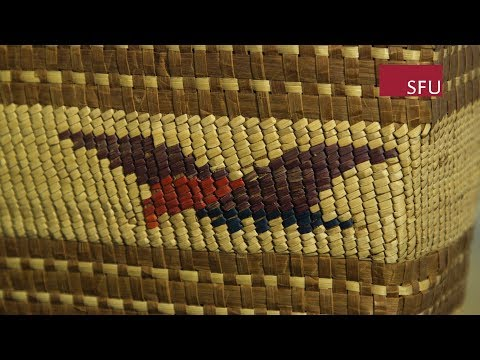

In [11]:
from IPython.display import YouTubeVideo
# SFU-Tla'amin Nation for Callysto: Tech and math preserve Indigenous culture and the art of basket weaving
YouTubeVideo('J58GU5iiYzQ')

We can include dynamic, interactive simulations, with just a little code.

In [12]:
%%writefile f1.template
<!DOCTYPE html>
<html>
    <meta http-equiv="Content-Type" content="text/html;charset=utf-8"/>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.js"></script>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.geom.js"></script>
    <script type="text/javascript" src="https://mbostock.github.io/d3/talk/20111018/d3/d3.layout.js"></script>
    <style type="text/css">

circle {
  stroke: #000;
  stroke-opacity: .5;
}

    </style>
  <body>
    <div id="body">
    <script type="text/javascript">

var w = {width},
    h = {height};

var nodes = d3.range({ball_count}).map(function() { return {radius: Math.random() * {rad_fac} + {rad_min}}; }),
    color = d3.scale.category10();

var force = d3.layout.force()
    .gravity(0.1)
    .charge(function(d, i) { return i ? 0 : -2000; })
    .nodes(nodes)
    .size([w, h]);

var root = nodes[0];
root.radius = 0;
root.fixed = true;

force.start();

var svg = d3.select("#body").append("svg:svg")
    .attr("width", w)
    .attr("height", h);

svg.selectAll("circle")
    .data(nodes.slice(1))
  .enter().append("svg:circle")
    .attr("r", function(d) { return d.radius - 2; })
    .style("fill", function(d, i) { return color(i % {color_count}); });

force.on("tick", function(e) {
  var q = d3.geom.quadtree(nodes),
      i = 0,
      n = nodes.length;

  while (++i < n) {
    q.visit(collide(nodes[i]));
  }

  svg.selectAll("circle")
      .attr("cx", function(d) { return d.x; })
      .attr("cy", function(d) { return d.y; });
});

svg.on("mousemove", function() {
  var p1 = d3.svg.mouse(this);
  root.px = p1[0];
  root.py = p1[1];
  force.resume();
});

function collide(node) {
  var r = node.radius + 16,
      nx1 = node.x - r,
      nx2 = node.x + r,
      ny1 = node.y - r,
      ny2 = node.y + r;
  return function(quad, x1, y1, x2, y2) {
    if (quad.point && (quad.point !== node)) {
      var x = node.x - quad.point.x,
          y = node.y - quad.point.y,
          l = Math.sqrt(x * x + y * y),
          r = node.radius + quad.point.radius;
      if (l < r) {
        l = (l - r) / l * .5;
        node.x -= x *= l;
        node.y -= y *= l;
        quad.point.x += x;
        quad.point.y += y;
      }
    }
    return x1 > nx2
        || x2 < nx1
        || y1 > ny2
        || y2 < ny1;
  };
}

    </script>
  </body>
</html>


Writing f1.template


In [13]:
from IPython.display import IFrame
import re

def replace_all(txt,d):
    rep = dict((re.escape('{'+k+'}'), str(v)) for k, v in d.items())
    pattern = re.compile("|".join(rep.keys()))
    return pattern.sub(lambda m: rep[re.escape(m.group(0))], txt)    

count=0
def serve_html(s,w,h):
    import os
    global count
    count+=1
    fn= '__tmp'+str(os.getpid())+'_'+str(count)+'.html'
    with open(fn,'w') as f:
        f.write(s)
    return IFrame('files/'+fn,w,h)

def f1(w=500,h=400,ball_count=150,rad_min=2,rad_fac=11,color_count=3):
    d={
       'width'      :w,
       'height'     :h,
       'ball_count' :ball_count,
       'rad_min'    :rad_min,
       'rad_fac'    :rad_fac,
       'color_count':color_count
       }
    with open('f1.template','r') as f:
        s=f.read()
    s= replace_all(s,d)        
    return serve_html(s,w+30,h+30)

In [17]:
# Moving ball simulation
f1(ball_count=50, color_count=20, rad_fac=20, rad_min=1, w=600) 

# Examples

# Open Data Integration


1. Explore Statistics Canada (Provincial GDP by Industry)
2. Explore NSERC Awards Data (Total Awards by University)
3. Investigate reproducible research on black hole collisions measured by LIGO

# Explore Statistics Canada Data

[Provincial GDP by Industry](https://github.com/colliand/economic-analysis/blob/master/provincial-gdp-by-industry-API.ipynb)

![provincial gdp](https://wwejubwfy.s3.amazonaws.com/economic-analysisprovincial-gdp-by-industry-API.ipynb_at_master__colliandeconomic-analysis_2019-06-08_22-37-22.png)

# Explore NSERC Awards Data

<br>


## [Publicly Available Code](https://github.com/colliand/nserc-analysis/blob/master/Explore-NSERC-Open-Data.ipynb)




<img src="https://wwejubwfy.s3.amazonaws.com/nserc-1995-2015-explore_2017-06-13_15-17-50.png" alt="Top 10 Institutions" width=40% align = "left">

<img src="https://wwejubwfy.s3.amazonaws.com/nserc-1995-2015-explore_2017-06-13_15-17-17.png" alt="Top 10 Institutions" width=40% align = "right">

# Driving Reproducible Research: LIGO / CERN


* [LIGO Notebook](https://cybera.syzygy.ca/jupyter/user/david.chan/notebooks/jupyter-demo-notebooks/Gravitational%20Waves%20Tutorial/GW150914_tutorial.ipynb)

![LIGO signal](https://wwejubwfy.s3.amazonaws.com/GW150914_tutorial-2016-11-13-20-26-04.jpg)

Clone repo and run/customize/build [using syzygy](https://cybera.syzygy.ca/jupyter/user/david.chan/notebooks/jupyter-demo-notebooks/Gravitational%20Waves%20Tutorial/GW150914_tutorial.ipynb). 

# Education and Research Communities

1. Berkeley Data Science Course: Computational and Inferential Thinking
2. Quantitative Economics
3. UBC Scientific Software Seminar: Deep Learning and Neural Networks in Python
4. Python for Digital Humanities
5. Pangeo

<br>



Other examples:

* SFU: [STAT201: Statistics for the Life Sciences](https://github.com/wruth1/Stat-201-Jupyter)
* UBC: [MAT210 Mathematical Computing](https://github.com/patrickwalls/math210)
* Calgary: [MAT651: Mathematical Modeling for Industry](https://github.com/mlamoureux/Math651w17/blob/master/Lec1_CourseInfo.ipynb)

# Computational and Inferential Thinking


## First year data science course at UC Berkeley

### Uses a Jupyter notebook based textbook

### [inferentialthinking.com](http://inferentialthinking.com)



# Quantitative Economics: Open Source Course for Economic Modeling

## Led by [Thomas Sargent of NYU](https://en.wikipedia.org/wiki/Thomas_J._Sargent), 2011 Nobel Laureate (Economics)

## [QuantEcon](https://quantecon.org/)

# Deep Learning and Neural Networks in Python

## Interdisciplinary Learning Seminar at UBC built atop Jupyter

## [UBCS3 on GitHub](https://github.com/ubcs3/2017-Winter)

# Python Programming for Humanities

## [Natural Language Processing](https://www.karsdorp.io/python-course/)

# [Pangeo.io](http://pangeo.io/)

## A community platform for Big Data geoscience

# Academy-Industry Examples

## [bcdata workshop](http://workshop.bcdata.ca/2017/#projects)

* [Industrial Projects appraoch by academy-industry collaboration team](http://workshop.bcdata.ca/2018/#projects)
* Example: [Genomic exploration of septic shock data](http://workshop.bcdata.ca/2018/project/project-2/) (led by [Keith Walley](https://www.hli.ubc.ca/profile/walley/keith))

# 2. Syzygy



# 2. Syzygy



### Scenario 1: Universities

+    Campus-wide interactive computing
+    LMS, SSO, library data integrations
+    Last mile for computing in courses


### Scenario 2: Research communities

+ Curated interactive computing
+ Research data integrations

## [Map of Installations](https://www.google.com/maps/d/embed?mid=1nzSAGLSn8eWdfQ6K7zTw-31h82I&hl=en)

![syzygy](https://intro.syzygy.ca/img/syzygy.jpg)

# Initial Installations

![installations](https://wwejubwfy.s3.amazonaws.com/Web_Image_2017-06-15_10-17-28.png)

# Active Hubs

last update: <2019-06-08 Sat> 

1.   [bcdata](https://bcdata.syzygy.ca)
-   [Brock](https://brocku.syzygy.ca/)
-   [Cybera](https://cybera.syzygy.ca)
-   [GNU Octave](https://octave.syzygy.ca)
-   [iReceptor](https://ireceptor.syzygy.ca/)
-   [McGill](https://mcgill.syzygy.ca)
-   [McMaster](https://mcmaster.syzygy.ca)
-   [PIMS](https://pims.syzygy.ca)
-   [Queen's U](https://queensu.syzygy.ca)
-   [SFU](https://sfu.syzygy.ca)
-   [U Alberta](https://ualberta.syzygy.ca)
-   [U Calgary](https://ucalgary.syzygy.ca)
-   [U Lethbridge](https://uleth.syzygy.ca)
-   [U Manitoba](https://umanitoba.syzygy.ca)
-   [U Montreal](https://umontreal.syzygy.ca)
-   [U New Brunswick](https://unb.syzygy.ca)
-   [U Ottawa](https://uottawa.syzygy.ca)
-   [U Regina](https://uregina.syzygy.ca)
-   [U Saskatchewan](https://usask.syzygy.ca)
-   [U Toronto](https://utoronto.syzygy.ca)
-   [U Victoria](https://uvic.syzygy.ca)
-   [U Washington](https://uw.syzygy.ca)
-   U Washington GPU
-   [U Waterloo](https://uwaterloo.syzygy.ca)
-   [UBC](https://ubc.syzygy.ca)
-   [VSE](https://vse.syzygy.ca)
-   [York U](https://yorku.syzygy.ca)



![syzygy stats](https://wwejubwfy.s3.amazonaws.com/Grafana_-_Syzygy_Global_2019-06-08_23-38-14.png)

# Current Status

## [stats.syzygy.ca](https://stats.syzygy.ca/grafana/d/M7PC-woik/syzygy-global?orgId=1)

last update: <2019-06-08 Sat> 

+ 15,274 Users
+ Single-sign-on hubs for 20 universities
+ specialized hubs for research communities
+ Served from multiple cloud and local infrastructures


### Compute Canada Allocation (April 2019 -- March 2020)

* 944 VCPU years on the arbutus-persistent-cloud system
* 9,216 GB of cloud storage on the arbutus-persistent-cloud system
* 5,310 GB of RAM on the arbutus-persistent-cloud system
* 354 volumes on the arbutus-persistent-cloud system
* 15 snapshots on the arbutus-persistent-cloud system
* 125 Floating IP addresses on the arbutus-persistent-cloud system



### Previous Allocation

* 240 VCPU years
* 3,072 GB of storage

# Infrastructure Provision

## Infrastructure vs service provision image

<img src="https://wwejubwfy.s3.amazonaws.com/Web_Image_2017-06-15_10-17-54.png" width ="75%"/>

# 3. Lessons Learned


# 3. Lessons Learned

Convergent research, reproducibility, data integration, knowedge mobilization, international partnerships,...


 +   Transdisciplinary transformation is underway
 +   Scalability strategy has been identified → how to pay for it?
 +   Curriculum redesign challenge remains
 +   Who should own interactive computing stack?


# Growing demand for interactive computing:


<br>




+ Universities




+ Research communities

# How should interactive computing demand be met?

# Thought Experiment

+ Should FedEx own Email?

+ Who should own Email?

# Who should own the interactive computing stack?

+ Amazon, Google, Microsoft, IBM?

+ A nonprofit or open source consortium?

![IBM Watson Studio](https://wwejubwfy.s3.amazonaws.com/Notebooks_-_IBM_Watson_2019-06-09_00-51-48.png)

![Google Colab](https://wwejubwfy.s3.amazonaws.com/Welcome_To_Colaboratory_-_Colaboratory_2019-06-09_00-44-53.png)

![Amazon Sagemaker](https://wwejubwfy.s3.amazonaws.com/Build_Train_and_Deploy_Machine_Learning_Models__Amazon_SageMaker_2019-06-09_00-46-21.png)

![Microsoft Azure Notebooks](https://wwejubwfy.s3.amazonaws.com/Microsoft_Azure_Notebooks_2019-06-09_00-47-46.png)

# 4. Future State

# 4. Future State

Example nonprofits serving global research communities

+ [JSTOR](https://about.jstor.org/mission-history/)
+ [arXiv.org](https://arxiv.org/help/general)


# Interactive Computing Nonprofit Vision Principles

+    Ubiquitous curated interactive computing
+    Align with university mission
+    Openly share best practices and code
+    Collaborate instead of compete
+    Cloud infrastructure agnostic
+    Sustainable operation


![2i2c](https://wwejubwfy.s3.amazonaws.com/ten.blue_2019-06-09_00-57-48.png)


## Join 2i2c? 

### [Nominate a 2i2c partner](https://docs.google.com/forms/d/e/1FAIpQLSdhMwDFUFFXGfcRNYk6m3SanRIQZynuqFFliBofkuXNK7SIWg/viewform)


## Try it out: 

### https://pims.syzygy.ca (Google authentication)

### https://uvic.syzygy.ca (UVic Sign in Service)


# Thank you!

### Questions?